**Pre-processing goals:**<br>
In the second part of the project we aimed to familiarize with our dataset and explore its possibilities in order to decide what trends we want to extract out of it. As mentioned before, we first take into account the archives of both the Gazette de Lausanne (GDL) and the Journal de Genève (JDG) during the XXth century. It restricts our dataset to a 100 years for both our journals. Now, we want to study the evolution of environnemental causes interests in the public space. Therefore, we are in a first part going to estimate this evolution and the eventual rises in society awareness on the topics related to these causes. 

**Pre-processing pipeline (Part 1):**<br>
We wanted to set up a basic pipeline in order to get a better view of what our dataset can offer and decide afterwards in which directions we could go on with our work. The below detailed pipeline is exectued for each journal separately.
- First, we extract all the archives from the XXth century of both our journals. Theses archives are xml files. We are therefore going to use the Beautiful Soup html parser to get a sense of what it contains. 
- From our own exploration of the dataset, we saw that all the articles had the following tags coming along: "name" to charaterize the name of the article and "issue_date" to indicate the date when the article was released in the journal. Thus, we are again going to use Beautiful Soup methods. Here, "find_all" will help us retrieve all the content of the previously mentioned tags that matter to our analysis. 
- Once that their content is retrieved we use the text attribute to put the names and issue dates of all articles in two separate lists. Each list is the size of the number of articles archived during the XXth century.
- After that we can verify that the articles and issue dates lists are of same length and it is indeed the case for both journals.

Paths to the data of both journals

In [1]:
ADA_DIR = "/Users/mathildeguillaumot/Documents/EPFL/ADA/myproject1v2"
DATA_FOLDER = ADA_DIR + "/data"
DATA_FOLDER_GDL = DATA_FOLDER + "/GDL/"
DATA_FOLDER_JDG = DATA_FOLDER + "/JDG/"
PICKLE_DATA_FOLDER = ADA_DIR + "/pickle_data/"
ARTICLES_FOLDER = PICKLE_DATA_FOLDER + "articles/"

In [2]:
# imports
import pandas as pd
import numpy as np
import os
from collections import defaultdict
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

import pickle

Retrieving of all folders of both journals

In [3]:
listing_gdl = os.listdir(DATA_FOLDER_GDL)

listing_jdg = os.listdir(DATA_FOLDER_JDG)

Here, we get rid of the 17th and 18th centuries folders as well as of hidden folders

In [4]:
prefixes = ('17', '18','.')
for dir_ in listing_gdl[:]:
    if dir_.startswith(prefixes):
        listing_gdl.remove(dir_)
        
for dir_ in listing_jdg[:]:
    if dir_.startswith(prefixes):
        listing_jdg.remove(dir_)

Retrieve articles' titles and issue dates from pickle

In [5]:
gdl_articles_titles_filename = PICKLE_DATA_FOLDER+"gdl_articles_titles"
obj = open(gdl_articles_titles_filename, 'rb')
articles_names_gdl = pickle.load(obj)

In [6]:
jdg_articles_titles_filename = PICKLE_DATA_FOLDER+"jdg_articles_titles"
obj = open(jdg_articles_titles_filename, 'rb')
articles_names_jdg = pickle.load(obj)

In [7]:
gdl_issue_dates_filename = PICKLE_DATA_FOLDER+"gdl_issue_dates"
obj = open(gdl_issue_dates_filename, 'rb')
dates_gdl = pickle.load(obj)

In [8]:
jdg_issue_dates_filename = PICKLE_DATA_FOLDER+"jdg_issue_dates"
obj = open(jdg_issue_dates_filename, 'rb')
dates_jdg = pickle.load(obj)

Here is the code used to retrieve the articles' titles list and relative issue dates from the GDL before dumping them into pickle files: 

    articles_names_gdl = []
    dates_gdl = []

    for infile_gdl in listing_gdl : 
        sublisting_gdl = os.listdir(DATA_FOLDER_GDL+infile_gdl)
        for insubfile_gdl in sublisting_gdl:
            display(infile_gdl+'/'+insubfile_gdl);
            file = open(DATA_FOLDER_GDL+infile_gdl+'/'+insubfile_gdl)
            page = file.read()

            soup = BeautifulSoup(page, 'html.parser')
            all_articles_name_gdl = soup.find_all('name')
            all_articles_date_gdl = soup.find_all('issue_date')
            for i in range(len(all_articles_date_gdl)):
                articles_names_gdl.append(all_articles_name_gdl[i].text)
                dates_gdl.append(all_articles_date_gdl[i].text)
                
Same code was used to retrieve issue dates and articles' titles from the JDG.

In [9]:
print('nb of articles (GDL): ', len(articles_names_gdl), '\n', 'nb of articles (JDG): ', len(articles_names_jdg))

nb of articles (GDL):  2184812 
 nb of articles (JDG):  2912098


In [10]:
print('nb of dates (GDL): ', len(dates_gdl), '\n', 'nb of dates (JDG): ', len(dates_jdg))

nb of dates (GDL):  2184812 
 nb of dates (JDG):  2912098


**Pre-processing pipeline (Part 2):**<br>
Now that the first part of our analysis is done we want to learn information about the extracted data. 
- To begin, we are putting each list into a pandas series.
- After that, we want to relate issue dates and the title of their related article. So we create 2 dataframes (one for each journal) with two columns: Issue dates and articles names.
- The format of the issue dates is propice to convert the related column into the datetime format.

And now we are going to proceed with our analysis.

Retrieving dataframes with issue dates and articles names columns from pickle

In [11]:
df_jdg = pd.read_pickle(PICKLE_DATA_FOLDER+'df_jdg')
df_gdl = pd.read_pickle(PICKLE_DATA_FOLDER+'df_gdl')

Here is the code used to create these dataframes before dumping them into pickle files:

    s_articles_gdl = pd.Series( (v for v in articles_names_gdl) )
    s_dates_gdl = pd.Series( (v for v in dates_gdl) )

    s_articles_jdg = pd.Series( (v for v in articles_names_jdg) )
    s_dates_jdg = pd.Series( (v for v in dates_jdg) )

    df_gdl = pd.DataFrame(s_dates_gdl, columns=['Issue Dates (GDL)'])
    df_gdl['Articles Names (GDL)'] = s_articles_gdl

    df_jdg = pd.DataFrame(s_dates_jdg, columns=['Issue Dates (JDG)'])
    df_jdg['Articles Names (JDG)'] = s_articles_jdg

In [12]:
df_jdg.head()

,Issue Dates (JDG),Articles Names (JDG)
0,1900-01-01,1&99
1,1900-01-01,1&99
2,1900-01-01,Untitled Article
3,1900-01-01,une fois le cercueil de l'ancien président ren...
4,1900-01-01,Untitled Article


In [13]:
df_gdl.head()

,Issue Dates (GDL),Articles Names (GDL)
0,1900-01-02,"Lausanne,2janvier1900. Regards en arrière"
1,1900-01-02,LES JUSTES
2,1900-01-02,A propos du colonel Lecomte.
3,1900-01-02,LETTRE DE PARIS
4,1900-01-02,Untitled Article


**Handling of untitled articles**
- How many untitled articles over total per issue year date are there over time?

In [14]:
#jdg 
df_jdg_untitled_articles = df_jdg[df_jdg['Articles Names (JDG)'].str.contains("Untitled Article")]

In [15]:
len(df_jdg_untitled_articles)

947051

Count # of untitled articles per year

In [16]:
df_jdg_untitled_articles_counts = df_jdg_untitled_articles['Issue Dates (JDG)'].dt.year.value_counts().sort_index()

In [17]:
df_jdg_untitled_articles_counts.head()

1900    11542
1901     9839
1902     9724
1903     9064
1904     9373
Name: Issue Dates (JDG), dtype: int64

Calculate rate of untitled articles over total per issuing year date 

In [18]:
df_jdg_untitled_articles_rates = df_jdg_untitled_articles_counts / df_jdg['Issue Dates (JDG)'].dt.year.value_counts()

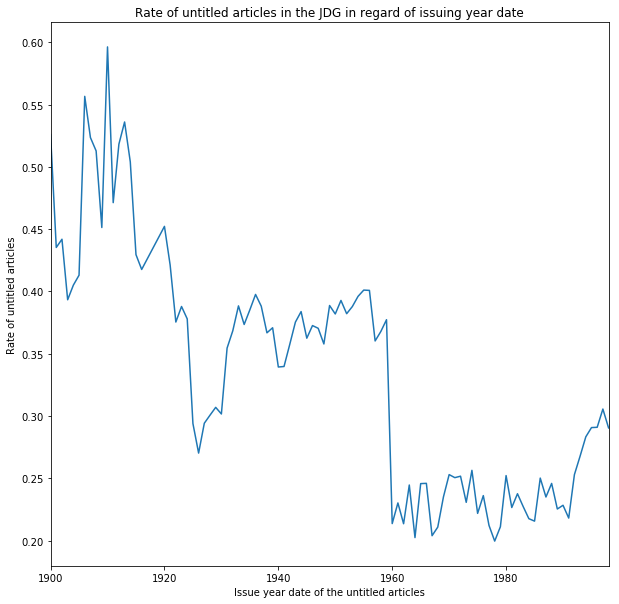

In [19]:
fig = plt.figure(figsize=(10, 10))
df_jdg_untitled_articles_rates.plot()
plt.title('Rate of untitled articles in the JDG in regard of issuing year date')
plt.xlabel('Issue year date of the untitled articles')
plt.ylabel('Rate of untitled articles')
pylab.savefig('UA_overTotal_jdg.png')

For the JDG, most of the untitled articles go back to the first decades of the 20th century from 1900 to 1920. The rates decrease consideratly afterwards. 

In [20]:
#gdl
df_gdl_untitled_articles = df_gdl[df_gdl['Articles Names (GDL)'].str.contains("Untitled Article")]

In [21]:
len(df_gdl_untitled_articles)

636655

In [22]:
df_gdl_untitled_articles.head()

,Issue Dates (GDL),Articles Names (GDL)
4,1900-01-02,Untitled Article
5,1900-01-02,Untitled Article
6,1900-01-02,Untitled Article
7,1900-01-02,Untitled Article
8,1900-01-02,Untitled Article


Count # of untitled articles per issue year

In [23]:
df_gdl_untitled_articles_counts = df_gdl_untitled_articles['Issue Dates (GDL)'].dt.year.value_counts().sort_index()

In [24]:
df_gdl_untitled_articles_counts.tail()

1994    18396
1995    16215
1996    24441
1997    14596
1998     2170
Name: Issue Dates (GDL), dtype: int64

Calculate rate of untitled articles over total per issuing year date

In [25]:
df_gdl_untitled_articles_rates = df_gdl_untitled_articles_counts / df_gdl['Issue Dates (GDL)'].dt.year.value_counts()

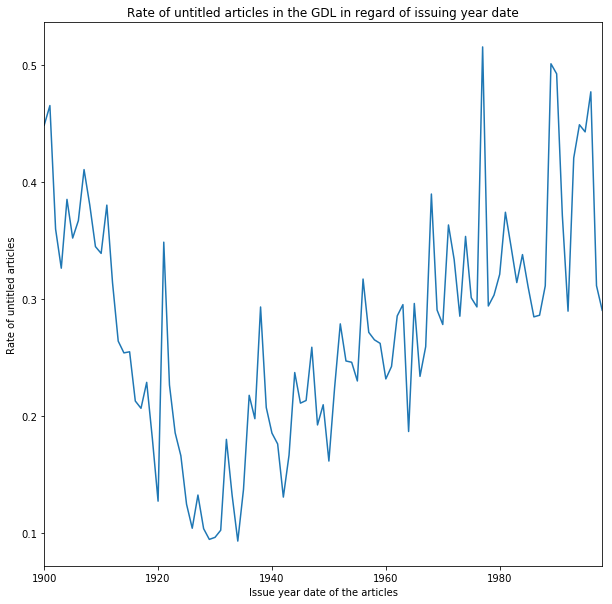

In [26]:
fig = plt.figure(figsize=(10, 10))
df_gdl_untitled_articles_rates.plot()
plt.title('Rate of untitled articles in the GDL in regard of issuing year date')
plt.xlabel('Issue year date of the articles')
plt.ylabel('Rate of untitled articles')
pylab.savefig('UA_overTotal_gdl.png')

For the GDL, there is no clear pattern as the rates decrease around 1930 before raising back to an approximative 40% rate as it was for the beginning of the century. 

**Retrieving of untitled articles' content to rescue environmentally talking articles**

In [27]:
import re

# function to match "green" words in articles' titles or first words of untitled articles' content
def findWholeWord(w):
    return re.compile(r'\b({0})\b'.format(w), flags=re.IGNORECASE).search

Below is the code used to retrieve the content of untitled articles talking about environmental topics:
    # list of "green" words
    vocab=list(pd.read_csv(DATA_FOLDER+"/Mylist.csv",header=None, squeeze = True))

    # get all the dates with untitled articles to look into the xml corresponding files
    dates = list(df_gdl_untitled_articles['Issue Dates (GDL)'].dt.to_period('M').drop_duplicates())

    In this section, we look into the first words of the untitled articles of the GDL in order to see if it mentions "green" words. If so, we store the article content in a list. Same is applied to the JDG.

    count = 0
    articles_fullText = []
    df = pd.DataFrame(columns = ['Issue Date', 'Article Name', 'Word found'])
    for i in range(len(dates)):
        year = str(dates[i].year)
        month = str(dates[i].month)
        if len(month) == 1:
            month = '0'+month
        print(year+'/'+month)
        file = open(DATA_FOLDER_GDL+year+'/'+month+'.xml')
        page = file.read()
        soup = BeautifulSoup(page, 'html.parser')
        UA_extracts = soup.find_all(text = "Untitled Article")
        for ite_ in range(len(UA_extracts)):
            article_extract = UA_extracts[ite_].parent.parent.full_text.text[:100]
            for word in list(vocab):
                if findWholeWord(word)(article_extract):
                    count += 1
                    new_row = {'Issue Date':UA_extracts[ite_].parent.parent.issue_date.text,
                          'Article Name':article_extract[:50],
                          'Word found':word}
                    df = df.append(new_row, ignore_index = True)
                    articles_fullText.append(UA_extracts[ite_].parent.parent.full_text.text)
                    print(article_extract)        
                    
    filename = 'UA_fullText_gdl'
    fileobj = open(filename, 'wb')
    pickle.dump(articles_fullText, fileobj)
    fileobj.close()

    df.to_pickle('df_UA_gdl')

In the above code we have renamed the untitled articles with the first 50 characters of the untitled article full text, we now load the dataframe which contains the issue date of the renamed articles and the "green" word they contain. We also load, the list containing the full content of these articles. Same is done for the JDG below.

In [214]:
fileobj = open(PICKLE_DATA_FOLDER+'/df_UA_gdl', 'rb')
df_UA_gdl = pickle.load(fileobj)

In [29]:
df_UA_gdl.head()

,Issue Date,Article Name,Word found
0,04/12/1943,Reboisement de l'Ecosse Deux ministres du gouv...,reboisement
1,18/08/1947,REBOISEMENT DES ILES BRITANNIQUES Les délégués...,reboisement
2,01/02/1962,<• Le Conseil fédéral a alloué une subvention ...,reboisement
3,28/06/1968,FR. 1 200 000. — POUR LE REBOISEMENT VERRAUX-J...,reboisement
4,20/01/1970,« ENVIRONNEMENT CONVENABLE. » — Un nouvel amen...,environnement


In [30]:
fileobj = open(ARTICLES_FOLDER+'/UA_fullText_gdl', 'rb')
UA_fullText_gdl = pickle.load(fileobj)

In [31]:
fileobj = open(PICKLE_DATA_FOLDER+'/df_UA_jdg', 'rb')
df_UA_jdg = pickle.load(fileobj)

In [32]:
df_UA_jdg.head()

,Issue Date,Article Name,Word found
0,04/10/1906,à réunir les fonds nécessaires pour assurer la...,reboisement
1,07/07/1908,"Les forestiers suisses, cl le reboisement. — L...",reboisement
2,22/07/1911,"un total de r 3,6 r 5 francs pour divers trava...",reboisement
3,23/06/1923,les-ci ne mettent pas en péril les forêts vois...,reboisement
4,14/01/1929,"l'irrigation, le reboisement de certaines régi...",reboisement


In [33]:
fileobj = open(ARTICLES_FOLDER+'/UA_fullText_jdg', 'rb')
UA_fullText_jdg = pickle.load(fileobj)

Now we need to get a similar dataframe as the one above with articles that have a title. We have proceeded in a similar manner that is:
- First, we get rid of the rows containing untitled article in the original dataframes loaded for both journals.
- Then we go over all the articles' titles in the df and if it matches one of the "green" word, we create a row with issue date, article title and matched word in the above looking dataframe. 

The code used is the following:

    df_gdl = df_gdl[~df_gdl['Articles Names (GDL)'].str.contains("Untitled Article")]

    df_jdg = df_jdg[~df_jdg['Articles Names (JDG)'].str.contains("Untitled Article")]

    df_gdl.reset_index(inplace = True, drop = True)

    df_jdg.reset_index(inplace = True, drop = True)
    
    vocab=pd.read_csv("Mylist.csv",header=None, squeeze = True)

    vocab = list(vocab)

    df = pd.DataFrame(columns = ['Issue Date', 'Article Name', 'Word found'])

    df_gdl.head()

    count = 0
    for i in range(len(df_gdl['Issue Dates (GDL)'])):
        display(i)
        for word in vocab:
            current_article = df_gdl['Articles Names (GDL)'].values[i]
            if findWholeWord(word)(current_article):
                count + = 1
                new_row = {'Issue Date':df_gdl['Issue Dates (GDL)'].values[i],
                          'Article Name':df_gdl['Articles Names (GDL)'].values[i],
                          'Word found':word}
                df = df.append(new_row, ignore_index = True)

The dataframes created in the above step are loaded via pickle

In [34]:
matched_words_gdl = pd.read_pickle(PICKLE_DATA_FOLDER+'/matched_words_gdl')

matched_words_jdg = pd.read_pickle(PICKLE_DATA_FOLDER+'/matched_words_jdg')

In [35]:
matched_words_gdl.head()

,Issue Date,Article Name,Word found
0,1902-12-20,L'iotace du climat sur l'homme.,climat
1,1910-03-20,LE CLIMAT DE LA SUISSE,climat
2,1912-06-14,An milieu de son peuple,milieu
3,1914-02-08,Le climat de Lausanne,climat
4,1918-12-04,"Brumeux, doux au milieu du jour.",milieu


In [36]:
matched_words_jdg.head()

,Issue Date,Article Name,Word found
0,1900-03-26,(1) La première et la troisième ligne se com p...,milieu
1,1900-07-28,Juillet Insolation Temptr. moyen. Maïïim . A f...,milieu
2,1900-08-08,Août Insolation Tempér. moyen. Maxim. à l'ombr...,milieu
3,1902-05-06,"Avril Insolation Temptr, moyen. Maxim. a l'omb...",milieu
4,1906-02-14,"Néanmoins, il convient rlo rester ca'me au mil...",milieu


Next step is to, like we did for the untitled articles, retrieve the full content of these articles.
Following is the code used to do so for the GDL (same for JDG):

    for word in list(matched_words_gdl['Word found'].unique()):
        print(word)
        articles_gdl = []
        df = matched_words_gdl[matched_words_gdl['Word found'] == word].reset_index(drop=True)
        titles_list = list(df['Article Name'])
        for i in range(len(titles_list)):
            print(str(i+1)+'/'+str(len(titles_list)))
            year = str(list(df['Issue Date'].dt.year)[i])
            month = list(df['Issue Date'].dt.month)[i]
            if len(str(month)) == 1:
                month = '0'+str(month)
            else:
                month = str(month)
            file = open(DATA_FOLDER_GDL+year+'/'+month+'.xml')
            page = file.read()
            soup = BeautifulSoup(page, 'html.parser')
            articles_gdl.append(soup.find(text=titles_list[i]).parent.parent.full_text.text)
        filename = word+'_gdl'
        fileObj = open(filename, 'wb')
        pickle.dump(articles_gdl, fileObj)
        fileObj.close()

The above code has produced pickle files, for each "green" word retrieved in a journal, containing the full text of the articles which titles contains this word.

We first included the words 'milieu' and 'climat' in our list of "green" words but the fact that they can be used in so many contexts other than the environmentally talking one will bring to much bias so we have decided to exclude them from the list and thus exclude the related articles retrieved.

In [37]:
matched_words_gdl = matched_words_gdl[matched_words_gdl['Word found'] != 'milieu']
matched_words_gdl = matched_words_gdl[matched_words_gdl['Word found'] != 'climat'].reset_index(drop=True)

matched_words_jdg = matched_words_jdg[matched_words_jdg['Word found'] != 'milieu']
matched_words_jdg = matched_words_jdg[matched_words_jdg['Word found'] != 'climat'].reset_index(drop=True)

In [38]:
matched_words_gdl.head()

,Issue Date,Article Name,Word found
0,1929-10-24,Le reboisement de la Palestine,reboisement
1,1935-05-27,Reboisement de la Galilée,reboisement
2,1947-06-18,Le reboisement des forêts ravagées par l'ouragan,reboisement
3,1948-08-24,I& REBOISEMENT DE LA CHINE,reboisement
4,1953-12-14,Les travaux de la Société des sciences naturel...,reboisement


In [39]:
matched_words_jdg.head()

,Issue Date,Article Name,Word found
0,1907-11-19,A la Chambre française Le budget. — La pêche d...,reboisement
1,1908-01-08,Le reboisement et l'initiative privée en France,reboisement
2,1908-09-30,Ls reboisement du Salive,reboisement
3,1908-09-30,Ls reboisement du Salive,reboisement
4,1949-06-10,Utt IMPORTANT REBOISEMENT M cïiiiie mille arbr...,reboisement


In [40]:
matched_words_gdl['Word found'].unique()

array(['reboisement', 'climax', 'écologie', 'environnement', 'biotope',
       'biomasse', 'compostage', 'espace vert', 'changement climatique',
       'biodégradable', 'déforestation', 'agriculture durable',
       'biodiversité', 'diversité biologique', 'écotaxe',
       'réchauffement global', 'environnemental',
       'réchauffement climatique', 'biozone', 'gaz à effet de serre'], dtype=object)

In [41]:
matched_words_jdg['Word found'].unique()

array(['reboisement', 'climax', 'écologie', 'environnement', 'biotope',
       'biomasse', 'espace vert', 'biodégradable', 'compostage',
       'déforestation', 'réchauffement global', 'agriculture durable',
       'biodiversité', 'diversité biologique', 'écotaxe',
       'environnemental', 'réchauffement climatique', 'biozone',
       'gaz à effet de serre'], dtype=object)

In [42]:
df_UA_gdl['Word found'].unique()

array(['reboisement', 'environnement', 'écologie', 'biomasse', 'biotope',
       'compostage'], dtype=object)

In [43]:
df_UA_jdg['Word found'].unique()

array(['reboisement', 'micro-climat', 'compostage', 'environnement',
       'climax', 'écologie', 'espace vert', 'biodiversité'], dtype=object)

In [44]:
green_words_gdl = matched_words_gdl['Word found'].value_counts().add(df_UA_gdl['Word found'].value_counts(), fill_value='0')

In [45]:
green_words_jdg = matched_words_jdg['Word found'].value_counts().add(df_UA_jdg['Word found'].value_counts(), fill_value='0')

Following are all the "green" words from our original list retrieved in either one of the journals

In [46]:
green_words_jdg.add(green_words_gdl, fill_value = '0').index.tolist()

['agriculture durable',
 'biodiversité',
 'biodégradable',
 'biomasse',
 'biotope',
 'biozone',
 'changement climatique',
 'climax',
 'compostage',
 'diversité biologique',
 'déforestation',
 'environnement',
 'environnemental',
 'espace vert',
 'gaz à effet de serre',
 'micro-climat',
 'reboisement',
 'réchauffement climatique',
 'réchauffement global',
 'écologie',
 'écotaxe']

Now, we plot the number of occurences of each "green" word over the century for each journal first and then for both journals combined.

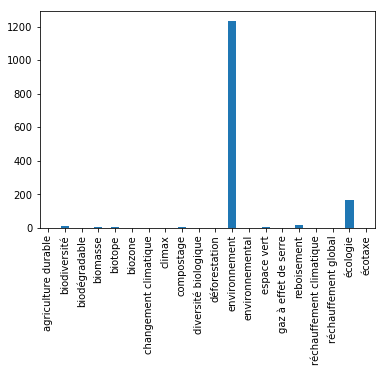

In [47]:
matched_words_gdl['Word found'].value_counts().add(df_UA_gdl['Word found'].value_counts(), fill_value='0').plot('bar')

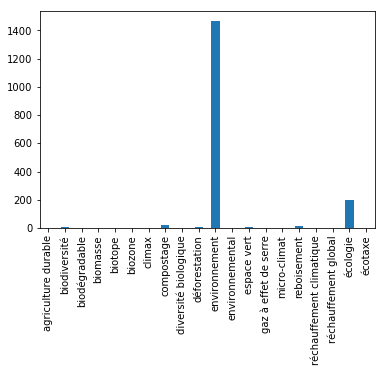

In [48]:
matched_words_jdg['Word found'].value_counts().add(df_UA_jdg['Word found'].value_counts(), fill_value='0').plot('bar')

In [49]:
occurences_ofWords_gdl = matched_words_gdl['Word found'].value_counts().add(df_UA_gdl['Word found'].value_counts(), fill_value='0')
occurences_ofWords_jdg = matched_words_jdg['Word found'].value_counts().add(df_UA_jdg['Word found'].value_counts(), fill_value='0')

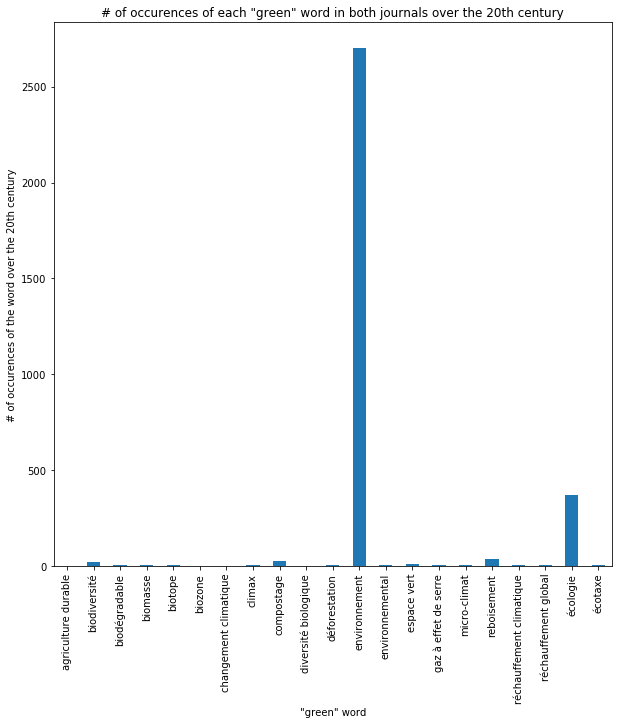

In [50]:
fig = plt.figure(figsize=(10, 10))
occurences_ofWords_gdl.add(occurences_ofWords_jdg, fill_value = '0').sort_index().plot('bar')
plt.title('# of occurences of each "green" word in both journals over the 20th century')
plt.xlabel('"green" word')
plt.ylabel('# of occurences of the word over the 20th century')
pylab.savefig('occurences_greenWordsOverCentury_bothJournals.png')

We are now going to look into the evolution of environmentally talking articles over time and this display the the number of occurences of all green words combined in regard of the issuing year dates of related articles. We plot this for each journal first and for both journals combined afterwards.

In [51]:
df_UA_gdl['Issue Date'] = pd.to_datetime(df_UA_gdl['Issue Date'], dayfirst = True)

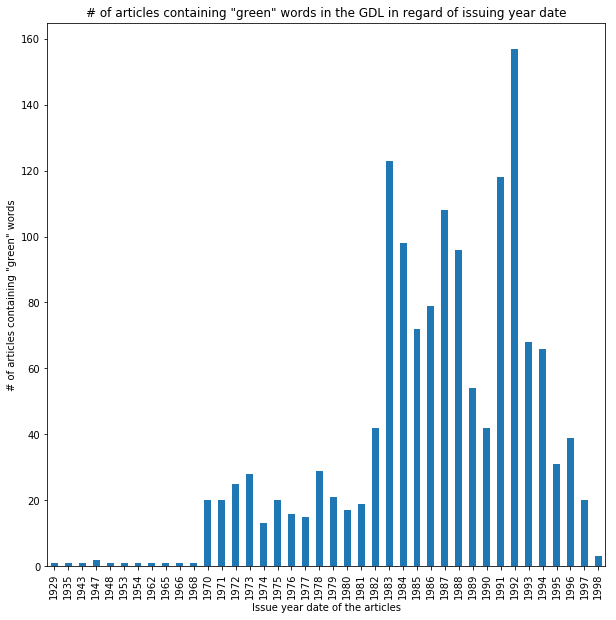

In [52]:
fig = plt.figure(figsize=(10, 10))
matched_words_gdl['Issue Date'].dt.year.value_counts().add(df_UA_gdl['Issue Date'].dt.year.value_counts(), fill_value='0').sort_index().plot('bar')
plt.title('# of articles containing "green" words in the GDL in regard of issuing year date')
plt.xlabel('Issue year date of the articles')
plt.ylabel('# of articles containing "green" words')
pylab.savefig('occurences_greenWords_gdl.png')

In [53]:
df_UA_jdg['Issue Date'] = pd.to_datetime(df_UA_jdg['Issue Date'], dayfirst = True)

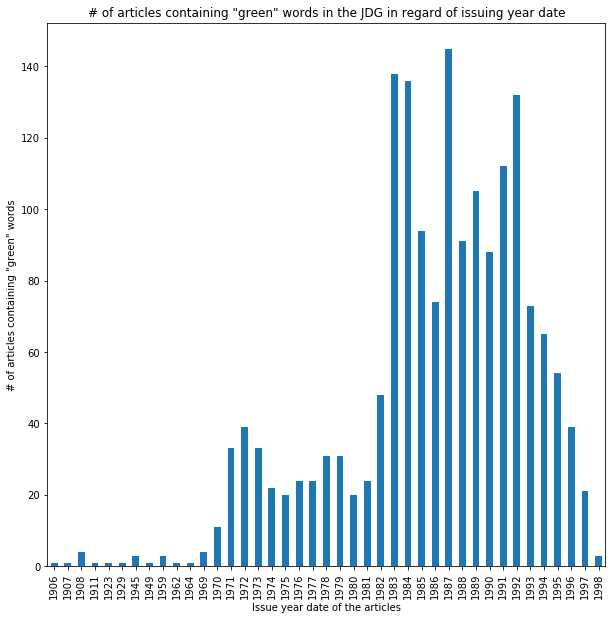

In [54]:
fig = plt.figure(figsize=(10, 10))
matched_words_jdg['Issue Date'].dt.year.value_counts().add(df_UA_jdg['Issue Date'].dt.year.value_counts(), fill_value='0').sort_index().plot('bar')
plt.title('# of articles containing "green" words in the JDG in regard of issuing year date')
plt.xlabel('Issue year date of the articles')
plt.ylabel('# of articles containing "green" words')
pylab.savefig('occurences_greenWords_jdg.png')

In [55]:
occurences_overTime_gdl = matched_words_gdl['Issue Date'].dt.year.value_counts().add(df_UA_gdl['Issue Date'].dt.year.value_counts(), fill_value='0').sort_index()
occurences_overTime_jdg = matched_words_jdg['Issue Date'].dt.year.value_counts().add(df_UA_jdg['Issue Date'].dt.year.value_counts(), fill_value='0').sort_index()

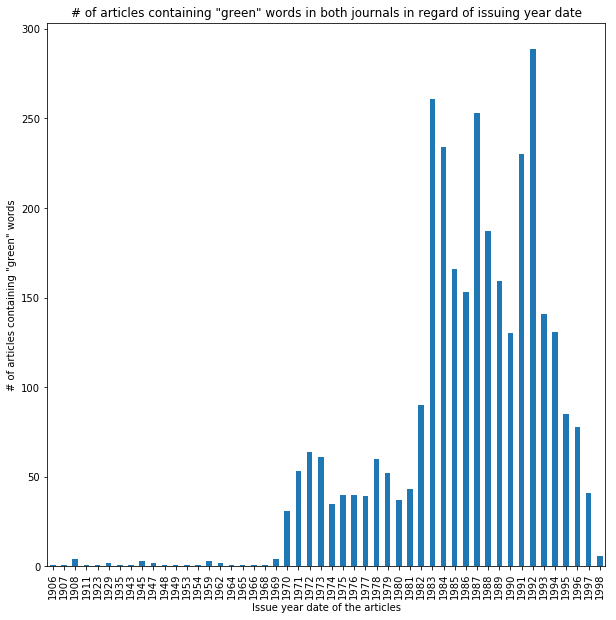

In [56]:
fig = plt.figure(figsize=(10, 10))
occurences_overTime_gdl.add(occurences_overTime_jdg, fill_value = '0').sort_index().plot('bar')
plt.title('# of articles containing "green" words in both journals in regard of issuing year date')
plt.xlabel('Issue year date of the articles')
plt.ylabel('# of articles containing "green" words')
pylab.savefig('occurences_greenWords_bothJournals.png')

**Topic Modelling**

Retrieve all articles' content from GDL and JDG in two separated lists

In [31]:
#gdl

In [57]:
articles_gdl = []
for word in list(matched_words_gdl['Word found'].unique()):
    fileobj = open(ARTICLES_FOLDER+word+'_gdl', 'rb')
    articles_fullText = pickle.load(fileobj)
    articles_gdl.append(articles_fullText)
articles_gdl.append(UA_fullText_gdl) 
#flatten list
articles_gdl = [y for x in articles_gdl for y in x]

Retrieve the titles of the articles in same order as they are in the list of contents

In [58]:
titles_list_gdl = matched_words_gdl['Article Name'].tolist() + df_UA_gdl['Article Name'].tolist()

In [59]:
#jdg

In [60]:
articles_jdg = []
for word in list(matched_words_jdg['Word found'].unique()):
    fileobj = open(ARTICLES_FOLDER+word+'_jdg', 'rb')
    articles_fullText = pickle.load(fileobj)
    articles_jdg.append(articles_fullText)
articles_jdg.append(UA_fullText_jdg)   
#flatten list
articles_jdg = [y for x in articles_jdg for y in x]

Retrieve the titles of the articles in same order as they are in the list of contents

In [61]:
titles_list_jdg = matched_words_jdg['Article Name'].tolist() + df_UA_jdg['Article Name'].tolist()

Retrieve all articles' for environment only

In [254]:
#gdl

In [247]:
word = 'environnement'    
fileobj = open(ARTICLES_FOLDER+word+'_gdl', 'rb')
articles_env_gdl = pickle.load(fileobj)

In [248]:
len(articles_env_gdl)

1175

In [249]:
index_of_UA_env = list(df_UA_gdl[df_UA_gdl['Word found'] == 'environnement'].index)

In [250]:
from operator import itemgetter 

In [251]:
articles_env_gdl = articles_env_gdl + list(itemgetter(*index_of_UA_env)(UA_fullText_gdl))

In [252]:
len(articles_env_gdl)

1233

retrieve titles of environnement articles above

In [339]:
titles_env_gdl = matched_words_gdl[matched_words_gdl['Word found'] == 'environnement']['Article Name'].tolist() + df_UA_gdl[df_UA_gdl['Word found'] == 'environnement']['Article Name'].tolist()

In [253]:
#jdg

In [255]:
word = 'environnement'    
fileobj = open(ARTICLES_FOLDER+word+'_jdg', 'rb')
articles_env_jdg = pickle.load(fileobj)

In [256]:
len(articles_env_jdg)

1421

In [259]:
index_of_UA_env = list(df_UA_jdg[df_UA_jdg['Word found'] == 'environnement'].index)

In [260]:
from operator import itemgetter 

In [261]:
articles_env_jdg = articles_env_jdg + list(itemgetter(*index_of_UA_env)(UA_fullText_jdg))

In [262]:
len(articles_env_jdg)

1467

In [341]:
titles_env_jdg = matched_words_jdg[matched_words_jdg['Word found'] == 'environnement']['Article Name'].tolist() + df_UA_jdg[df_UA_jdg['Word found'] == 'environnement']['Article Name'].tolist()

Stop words

In [343]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mathildeguillaumot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [344]:
stop = list(stopwords.words('french'))

In [345]:
stop.append('contre')
stop.append('entre')

In [346]:
len(stop), len(stop_words)

(157, 247)

In [347]:
from stop_words import get_stop_words

In [348]:
stop_words = get_stop_words('fr')

In [349]:
all_stop_words = set(stop).union(set(stop_words))

Topic modelling process

In [350]:
import sklearn.feature_extraction.text as text

In [351]:
vectorizer = text.CountVectorizer(input='content', max_df = 0.7, stop_words = all_stop_words, analyzer = 'word')

In [352]:
articles_gdl_copy = articles_env_gdl.copy()

In [353]:
for i in range(len(articles_gdl_copy)):
    articles_gdl_copy[i] = re.sub(r'\b\w{1,4}\b', '', articles_gdl_copy[i])

In [354]:
dtm = vectorizer.fit_transform(articles_gdl_copy).toarray()

In [355]:
vocab = np.array(vectorizer.get_feature_names())

In [356]:
dtm.shape

(1233, 25811)

In [357]:
len(vocab)

25811

In [358]:
from sklearn import decomposition

In [359]:
num_topics = 10

In [360]:
num_top_words = 3

In [361]:
clf = decomposition.NMF(n_components=num_topics, random_state=1)

In [362]:
doctopic = clf.fit_transform(dtm)

In [363]:
topic_words = []

In [364]:
for topic in clf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i] for i in word_idx])

In [365]:
topic_words

[['économie', 'économique', 'pollution'],
 ['conseil', 'fédéral', 'commission'],
 ['déchets', 'spéciaux', 'tonnes'],
 ['suisse', 'fédéral', 'suisses'],
 ['développement', 'genève', 'conférence'],
 ['marché', 'hausse', 'indice'],
 ['protection', 'office', 'fédéral'],
 ['jusqu', 'centre', 'lausanne'],
 ['aujourd', 'ainsi', 'millions'],
 ['pollution', 'mesures', 'forêts']]

In [366]:
for i in range(len(doctopic)):
    top_topics = np.argsort(doctopic[i,:])[::-1][0:3]
    top_topics_str = ' '.join(str(t) for t in top_topics)
    print("{}: {}".format(titles_env_gdl[i], top_topics_str))

LES RATS DE VILLE ET L'«ENVIRONNEMENT»: 8 7 9
«ENVIRONNEMENT »: 8 0 7
•dada, environnement lumino-cinétique, bandes dessinées: 8 7 3
Environnement •. Des milliers d'hectares ae parc dans l'arrière-cour de Londres: 8 9 6
Notre environnement immédiat Le papier: 8 0 5
Les gaz d'automobile et l'environnement: 9 8 3
Environnement: le grand combat de l'Amérique: 8 9 0
ENVIRONNEMENT: LE GRANDCOMBAT DE L'AMÉRIQUE: 8 9 4
L'ENVIRONNEMENT AUX ETATS-UNIS. - II: 8 0 9
Conseil des Etats: oui à l'article constitutionnel sur l'environnement: 1 6 4
L'ENVIRONNEMENT AUX ETATS-UNIS. - V Ecologie: ressouder les maillons brisés: 8 9 0
L'environnement aux Etats-Unis: 8 0 6
L'ENVIRONNEMENT AUX ETATS-UNIS. - VI La marche arrière à quel prix ?: 8 9 0
L'ENVIRONNEMENT AUX ÉTATS-UNIS: 8 0 5
L'ENVIRONNEMENT AUX ETATS-UNIS. - VII LA MARCHE ARRIÈRE: LE BAL DES MILLIONS: 8 9 0
Paris: M. Robert Poujade ministre de l'Environnement: 9 8 7
Environnement : le temps presse: 1 3 6
Développement du cerveau et environnement vi

In [367]:
for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))

Topic 0: économie économique pollution
Topic 1: conseil fédéral commission
Topic 2: déchets spéciaux tonnes
Topic 3: suisse fédéral suisses
Topic 4: développement genève conférence
Topic 5: marché hausse indice
Topic 6: protection office fédéral
Topic 7: jusqu centre lausanne
Topic 8: aujourd ainsi millions
Topic 9: pollution mesures forêts


In [368]:
print(articles_env_gdl[0])

LES RATS DE VILLE ET L' « ENVIRONNEMENT » PITTSBURGH (Pennsylvanie), 3 févrU'i : — Comme les êtres humains, les rais supportent mal les tensions urbaines, font de l'hypertension et se montrent irritables. Tels sont les résultats des expériences pratiquées par le Dr Joseph Buckey, de l'Université de Pittsburgh. Cinq mille rats ont été placés dans une chambre simulant les conditions de la vie dans les villes. Après quelque temps de vacarme, de lumières éblouissantes et d'agitation, ils ont fait du l'hypertension. Malheureusement pour les habitants de Pittsburgh, la population raticole semble avoir bien résisté à la situation actuelle puisqu'il y a un rat pour deux personnes. Un million de rongeurs ont été exterminés en 1969. peut-être certains sont-ils morts d'hypertension. (Ap)
